# Support Vector Machine



1. SVM with sklearn
2. SVM with numpy and gradient descend
3. SVM with python class, numpy ans gradient descend
4. LR with regularizationsSVM

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification

from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, f1_score, log_loss,
    precision_score, recall_score, roc_auc_score, 
    classification_report, confusion_matrix
)

sns.set(palette="Set1")
plt.rcParams["figure.figsize"] = (10, 4)

## Sample Data

- Not linearly separable sample data
- 

In [22]:
n_samples = 3000
n_features = 2
class_sep = 1.6 #hihger value makes the class more distinct to each other
data_X, data_y = make_classification(
    n_samples=n_samples, n_features=n_features, n_redundant=0, 
    n_informative=2, class_sep=class_sep, n_classes=2, shuffle=True, 
    random_state=42
)
print(data_X.shape, data_y.shape)

(3000, 2) (3000,)


In [23]:
# change labels to 1 and -1
data_y[data_y == 0] = -1

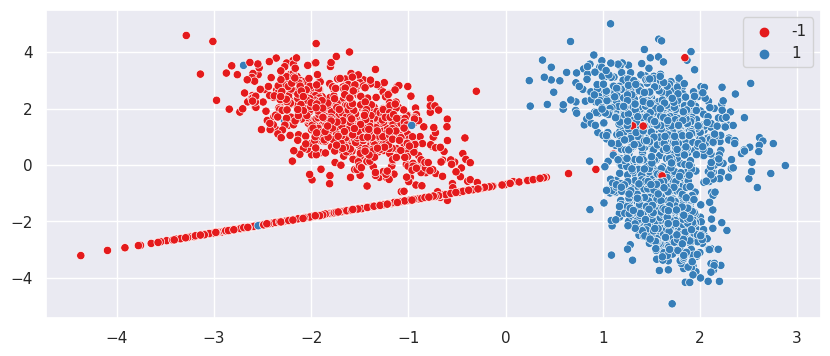

In [24]:
sns.scatterplot(x=data_X[:, 0], y=data_X[:, 1], hue=data_y, palette="Set1")
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data_X, data_y, test_size=0.2,random_state=714)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2400, 2) (600, 2) (2400,) (600,)


## Modelling with SVM

### SVC

### From Scratch

In [25]:
max_v = np.amax(data_X); min_v = np.amin(data_X)
max_v, min_v

(4.999202866534922, -4.91522271000316)

In [26]:
# reduce weight by learning rate during optimization
# learning_rates = [max_v * .1, max_v * .01, max_v * .001]
learning_rates = [max_v*.1, max_v*.01, max_v*.001, max_v*.0001]

# initial value for w, this will be updated by learning rate
initial_w = max_v * 10 

# transform w, so that not affected by quadrant
transformations = [
    [1,1],[-1,1],[-1,-1],[1,-1]
]

In [30]:
# oyi * (np.dot(w_tsed, xi) + b)
yi * (np.dot(w_tsed, xi) + b)

-22.49641289940692

In [33]:
%%time
w = np.array([initial_w, initial_w])

for lrate in learning_rates: 
    # while weight is not negative, i.e. still stepping down in convex
    while w[0] > 0: 
        for b in np.arange(-5*max_v, 5*max_v, step=lrate*5): 
            for ts in transformations: 
                # this can be reduced, since transform once is enough
                w_tsed = w * ts
                found_possible_params = True
                
                for xi, yi in zip(data_X, data_y): 
                    if yi * (np.dot(w_tsed, xi) + b) < 1.:
                        # if smaller than 1, they're not separating the data
                        found_possible_params = False
                        break
                if found_possible_params: 
                    # params[np.linalg.norm(w_tsed)] = [w_tsed, b]
                    params.append((np.linalg.norm(w_tsed), w_tsed, b))
        
        # update weight by learning rate
        w = w - np.array([lrate, lrate])
        
    # after while loop, get the minimum ||w|| parameters
    # or could do tmp value and then update if ||w|| is smaller, without sort & list
    params.sort(key=lambda x: x[0])
    optimal_w = params[0][1]; w = optimal_w + lrate * 2 # add some steps back
    optimal_b = params[0][2]

CPU times: user 4.62 s, sys: 4.25 ms, total: 4.63 s
Wall time: 4.63 s


In [34]:
optimal_w, optimal_b

(array([0.17530468, 0.17530468]), 0.8303905850228475)

In [35]:
data_X[:, 0].min(), data_X[:, 0].max()

(-11.660921821369122, -0.450864300814934)

## SVM from scratch

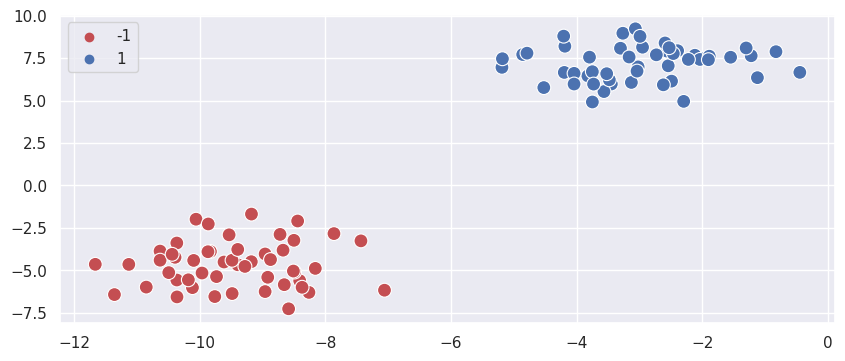

In [31]:
from sklearn.datasets import make_blobs

(data_X, data_y) = make_blobs(n_samples=100, n_features=2, centers=2, \
                    cluster_std=1.15, random_state=727)
# change labels to 1 and -1
data_y[data_y == 0] = -1

sns.scatterplot(x=data_X[:,0], y=data_X[:,1], hue=data_y, palette={1: 'b', -1:'r'}, s=100)
plt.legend(loc='upper left')
plt.show()

In [32]:
max_v = np.amax(data_X); min_v = np.amin(data_X)

# reduce weight by learning rate during optimization
learning_rates = [max_v * .1, max_v * .01, max_v * .001]
# initial value for w, this will be updated by learning rate
initial_w = max_v * 10 
# transform w, so that not affected by quadrant
transformations = [[1,1],[-1,1],[-1,-1],[1,-1]]
# list with (||w||, w, b)
params = []

In [33]:
%%time
w = np.array([initial_w, initial_w])

for lrate in learning_rates: 
    # while weight is not negative, i.e. still stepping down in convex
    while w[0] > 0: 
        for b in np.arange(-5*max_v, 5*max_v, step=lrate*5): 
            for ts in transformations: 
                # this can be reduced, since transform once is enough
                w_tsed = w * ts
                found_possible_params = True
                
                for xi, yi in zip(data_X, data_y): 
                    if yi * (np.dot(w_tsed, xi) + b) < 1.:
                        # if smaller than 1, they're not separating the data
                        found_possible_params = False
                        break
                if found_possible_params: 
                    # params[np.linalg.norm(w_tsed)] = [w_tsed, b]
                    params.append((np.linalg.norm(w_tsed), w_tsed, b))
        
        # update weight by learning rate
        w = w - np.array([lrate, lrate])
        
    # after while loop, get the minimum ||w|| parameters
    # or could do tmp value and then update if ||w|| is smaller, without sort & list
    params.sort(key=lambda x: x[0])
    optimal_w = params[0][1]; w = optimal_w + lrate * 2 # add some steps back
    optimal_b = params[0][2]

CPU times: user 4.62 s, sys: 4.25 ms, total: 4.63 s
Wall time: 4.63 s


In [34]:
optimal_w, optimal_b

(array([0.17530468, 0.17530468]), 0.8303905850228475)

In [35]:
data_X[:, 0].min(), data_X[:, 0].max()

(-11.660921821369122, -0.450864300814934)

## Plot the Hard-Margin

In [36]:
# setup x1 values for plot, using range of x1
tmp = np.arange(data_X[:, 0].min(), data_X[:, 0].max(), step=.5)
# wx + b = 0, for the decision boundary
# i.e. w1x1 + w2x2 + b = 0, x2 = (-(w1x1)-b)/w2
print(tmp)
print((-(optimal_w[0] * tmp) - optimal_b) / optimal_w[1])

[-11.66092182 -11.16092182 -10.66092182 -10.16092182  -9.66092182
  -9.16092182  -8.66092182  -8.16092182  -7.66092182  -7.16092182
  -6.66092182  -6.16092182  -5.66092182  -5.16092182  -4.66092182
  -4.16092182  -3.66092182  -3.16092182  -2.66092182  -2.16092182
  -1.66092182  -1.16092182  -0.66092182]
[ 6.92407972  6.42407972  5.92407972  5.42407972  4.92407972  4.42407972
  3.92407972  3.42407972  2.92407972  2.42407972  1.92407972  1.42407972
  0.92407972  0.42407972 -0.07592028 -0.57592028 -1.07592028 -1.57592028
 -2.07592028 -2.57592028 -3.07592028 -3.57592028 -4.07592028]


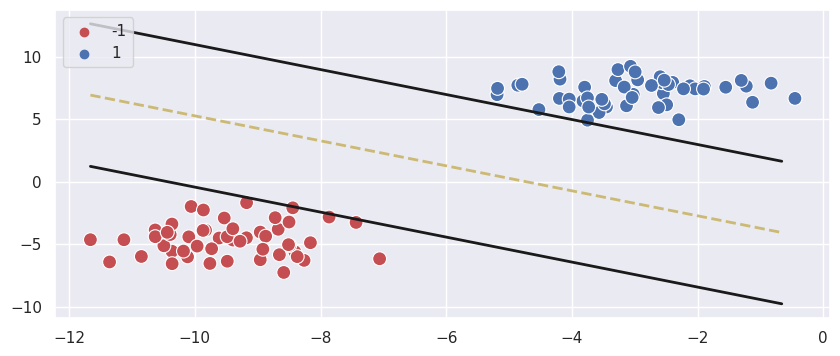

In [37]:
sns.scatterplot(x=data_X[:,0], y=data_X[:,1], hue=data_y, palette={1: 'b', -1:'r'}, s=100)

# plot the boundaries
# sns.lineplot(x=tmp, y=(-(optimal_w[0] * tmp) - b) / optimal_w[1], dashes=True)
plt.plot(tmp, (-(optimal_w[0] * tmp) - optimal_b) / optimal_w[1], 'y--', linewidth=2)
plt.plot(tmp, (-(optimal_w[0] * tmp) - optimal_b+1) / optimal_w[1], 'k', linewidth=2)
plt.plot(tmp, (-(optimal_w[0] * tmp) - optimal_b-1) / optimal_w[1], 'k', linewidth=2)

plt.legend(loc='upper left')
plt.show()

## Predict on new instances

In [38]:
# within the margin
in_margin = np.array([[-8, 0], [-2, -5], [-2, 0], [-10, 10]])
# outside the margin
out_margin = np.array([[-2, -10], [-11, -9], [-8, 12], [-1, 7]])

In [39]:
np.sign(np.dot(np.array([-8, 0]), optimal_w) + optimal_b)

-1.0

In [40]:
in_sign = np.sign(np.dot(np.array(in_margin), optimal_w) + optimal_b)
out_sign = np.sign(np.dot(np.array(out_margin), optimal_w) + optimal_b)

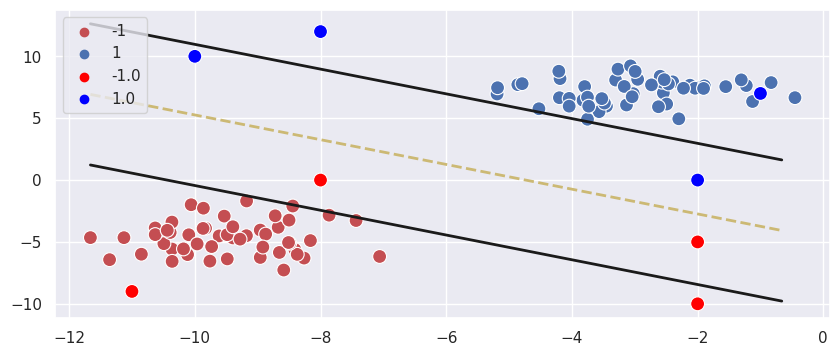

In [41]:
sns.scatterplot(x=data_X[:,0],y=data_X[:,1], hue=data_y, palette={1: 'b', -1:'r'}, s=100)

# plot the boundaries
# sns.lineplot(x=tmp, y=(-(optimal_w[0] * tmp) - b) / optimal_w[1], dashes=True)
plt.plot(tmp, (-(optimal_w[0] * tmp) - optimal_b) / optimal_w[1], 'y--', linewidth=2)
plt.plot(tmp, (-(optimal_w[0] * tmp) - optimal_b+1) / optimal_w[1], 'k', linewidth=2)
plt.plot(tmp, (-(optimal_w[0] * tmp) - optimal_b-1) / optimal_w[1], 'k', linewidth=2)

sns.scatterplot(x=np.r_[in_margin[:, 0] ,out_margin[:, 0]], \
                y=np.r_[in_margin[:, 1] ,out_margin[:, 1]], \
                hue=np.r_[in_sign, out_sign], palette={1: 'blue', -1:'red'}, s=100)

plt.legend(loc='upper left')
plt.show()